<a href="https://colab.research.google.com/github/Maryam-Mostafa/Dry-Beans-Classification/blob/master/dryBeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importing liberaries**

# New section

In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from collections import Counter
from scipy.stats import randint, loguniform
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =pd.read_csv('/content/drive/MyDrive/kaggle_competition1_resources/dataset/train.csv')

In [ ]:
data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


# EDA 

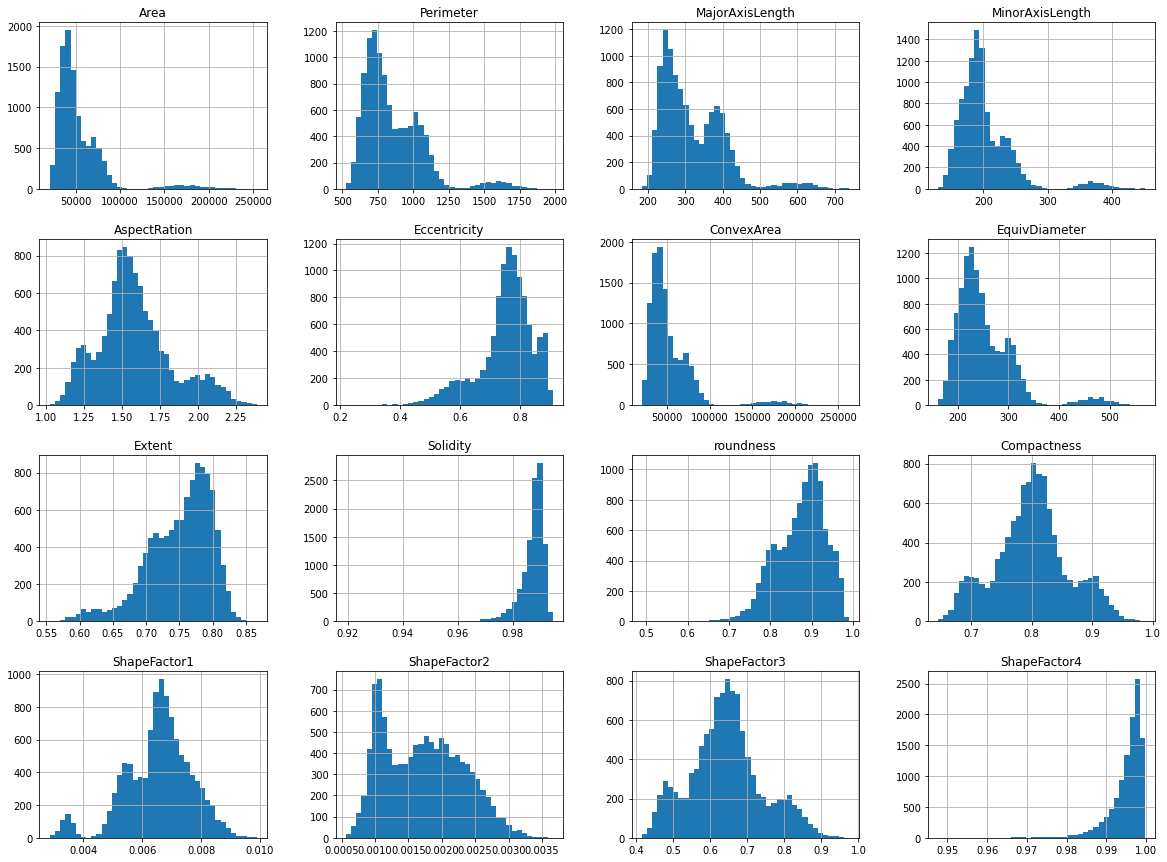

In [ ]:
hist_df = data.drop(['ID','y'], axis=1)
hist_df.hist(layout=(4,4), figsize=(20,15),bins=40)
plt.show()



*   Features that are skewed, will be transformed using **box-cox** power transformer

> https://opendatascience.com/transforming-skewed-data-for-machine-learning/


*   Features that approximate a normal distribution will be **standardized**.

**Box-Cox transform:** Area, Perimeter, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness,ShapeFactor4.

**Standardization:** AspectRation, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3

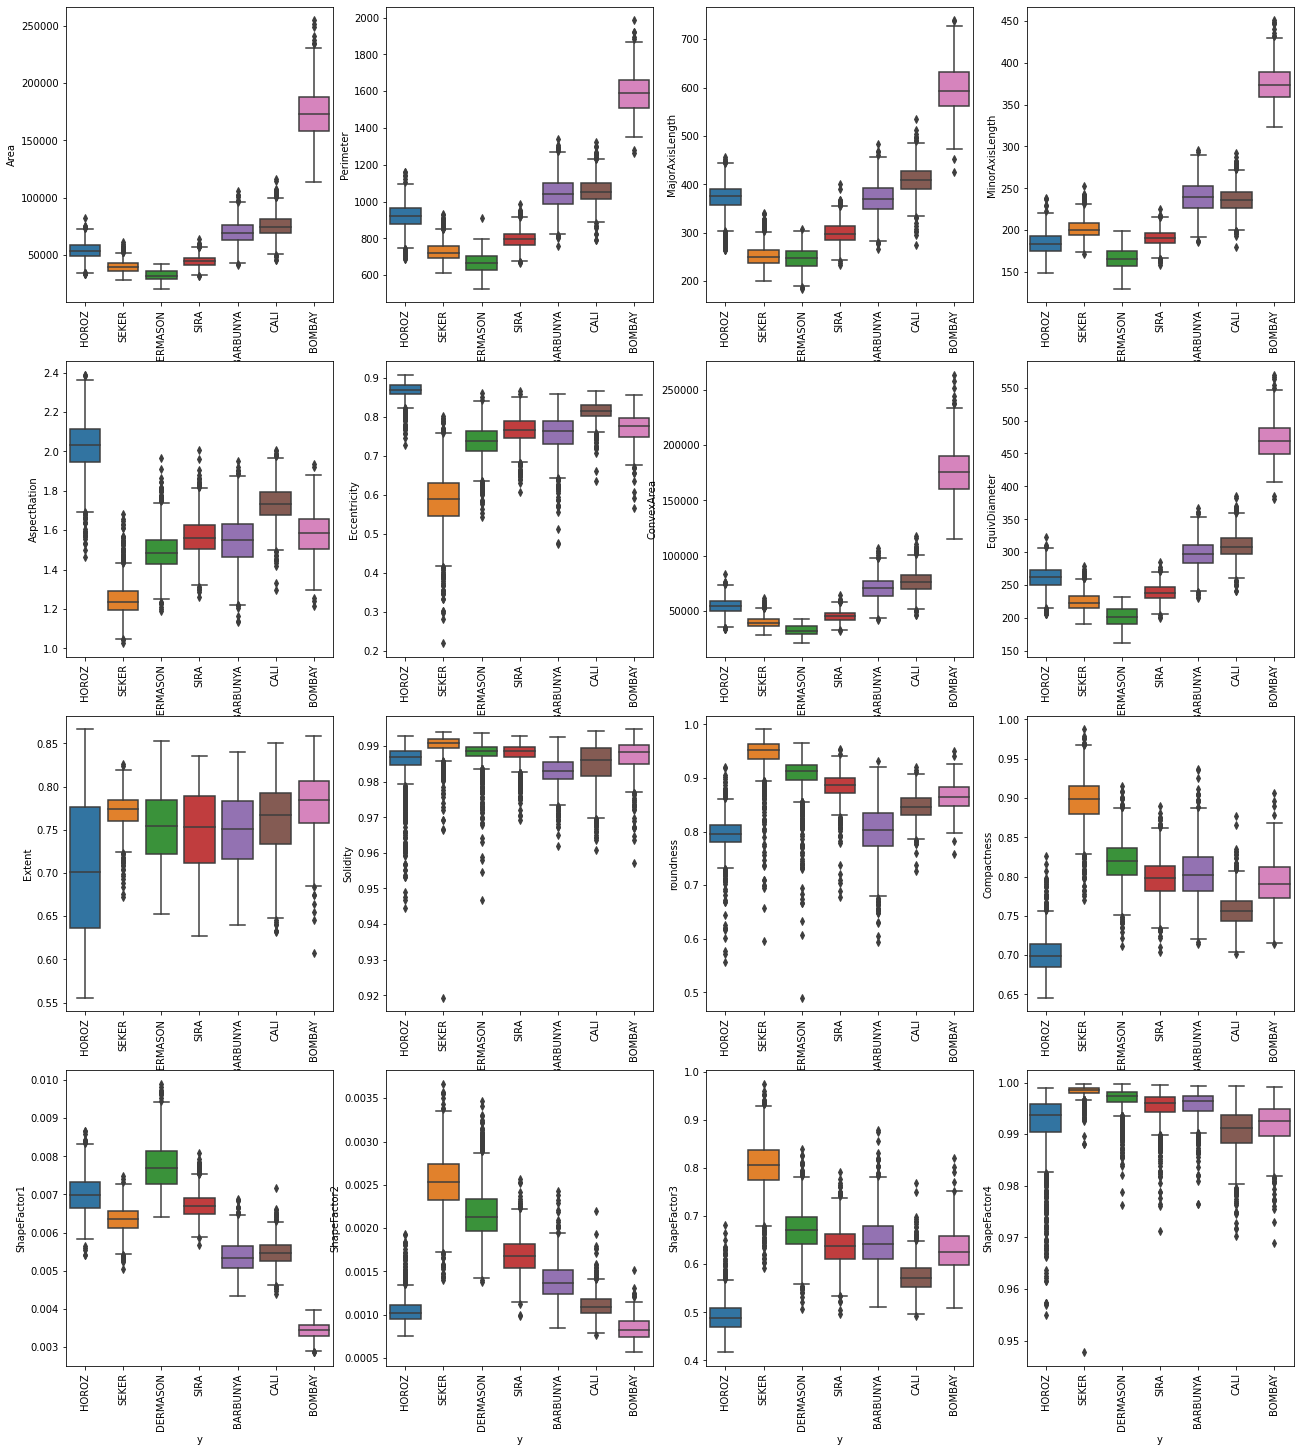

In [ ]:
col = data.drop(['ID','y'],axis=1).columns
fig, axes = plt.subplots(4,4, figsize=(22,25))
for i,t in enumerate(col):
    ax = sns.boxplot(y=t, x= "y", data=data, orient='v', ax=axes.flatten()[i] )
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

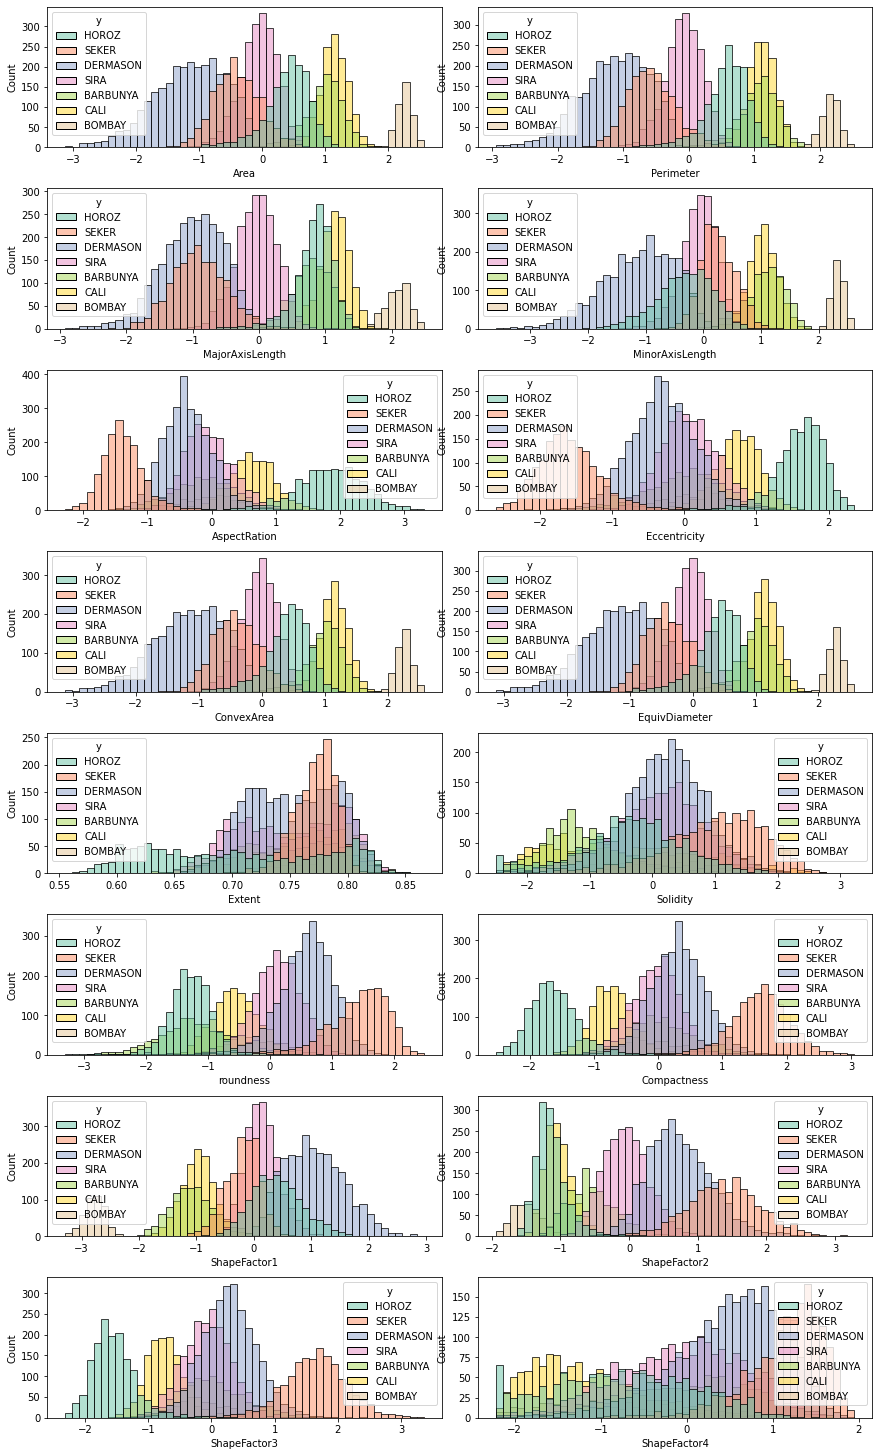

In [ ]:
nrows = 8
ncols = 2
X = data.drop(['ID', 'y'], axis = 1)
fig, axes = plt.subplots(nrows, ncols)
fig.set_size_inches(12, 20)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
feat_iter = 0
sns.set_palette("Set2", 7)
for i in range(0, nrows):
  for j in range(0, ncols):
    sns.histplot(ax=axes[i,j], x = X.columns[feat_iter], bins = 50, hue = data['y'], data=X)
    feat_iter+=1 


*   The **features Extent, Solidity, ShapeFactor4** do not provide much discrimination 
between the classes. So we might consider excluding them.
*  There is **ouliers** in the dataset.



In [ ]:
#visualizing classes using TSNE
from sklearn.manifold import TSNE

tsne_res = TSNE(n_components=2).fit_transform(MinMaxScaler().fit_transform(data.select_dtypes(include=np.number)))
plt.figure(figsize=(15,8))
sns.scatterplot(x=tsne_res[:,0], y=tsne_res[:,1], hue= data['y'], palette='deep')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


NameError: ignored

<Figure size 1080x576 with 0 Axes>



*   use pca.cumsum to know each component contain how much from the original features. هل كافيين يعبرولا عن الداتا كلها



In [ ]:
# #visualizing classes using TSNE
# from sklearn.manifold import TSNE

# tsne_res3 = TSNE(n_components=3).fit_transform(MinMaxScaler().fit_transform(data.select_dtypes(include=np.number)))
# plt.figure(figsize=(15,8))
# fig = plt.figure(figsize=(15,15))
# ax = fig.gca(projection='3d')
# ax = fig.add_subplot(111, projection="3d")
# s = ax.scatter(tsne_res3[:,0],tsne_res3[:,1],tsne_res3[:,2],cmap='Paired', c =Y , edgecolor = "black", s = 50, label=Y)

# plt.show()

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# #ax = fig.add_subplot(111, projection = '3d')

# # x = df['Happiness Score']
# # y = df['Economy (GDP per Capita)']
# # z = df['Health (Life Expectancy)']

# # ax.set_xlabel("Happiness")
# # ax.set_ylabel("Economy")
# # ax.set_zlabel("Health")

# #ax.scatter(tsne_res[:, 0], tsne_res[:, 1], tsne_res[:, 2])
# import plotly.express as px
# clustering_fig = px.scatter_3d(tsne_res, color=Y, color_continuous_scale='turbid')
# clustering_fig.show()





We see from the figure above that:
*   class **BOMBAY** is well-separeted from the other classes.
*   however classes **DERMASON** and **SIRA** are the most intertwined.  


> So I think that we could train different models but each time we will train with removing once DERMASON, and in the other model we will remove SIRA and merge the 2 models together. 


(this is wrong not our case anymore)

our case can be solved using neural networks or svm kernel in link 3,4

1- [click here to read more about this](https://stats.stackexchange.com/questions/523397/how-to-handle-overlapping-classes)


2- [and also see this paper](https://www.atlantis-press.com/article/2053.pdf)


3- [this answer said that we can handle this by kernel/neural networks](https://stackoverflow.com/questions/30100076what-classifier-in-machine-learning-could-be-better-when-i-have-class-overlapping)

4- [see this too](https://datascience.stackexchange.com/questions/10310/classification-with-heavily-overlapping-data-points-of-different-labels)







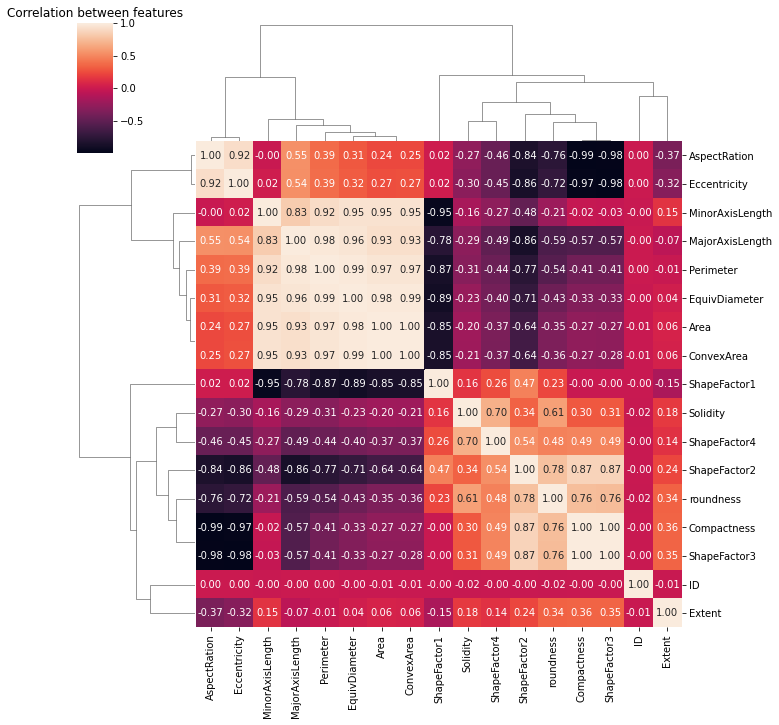

In [ ]:
# Visualizing the correlation between the features
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between features");plt.show()

1. data are **highly correlated** we will fix this by:
  *   pca
  *   or dropping some features
2. It's good to see the **dendogram** here.

In [ ]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers

In [ ]:
# data = data.drop(detect_outliers(data,['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
#                                        'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
#                                        'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']), axis=0).reset_index(drop=True)
# print('Number of of samples in the dataset after removing outliers: %d' % len(data))

Number of of samples in the dataset after removing outliers: 9705


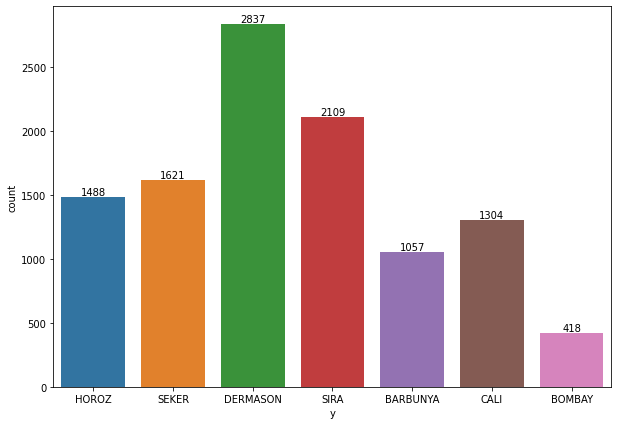

In [ ]:
# Bar Chart to visualize the labels in the output variable
plt.figure(figsize=(10,7))
ax = sns.countplot(x=data['y'])
for i in ax.patches:
  ax.annotate("{}".format(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom', size=10)
plt.show()

As it is noticeable, there's a huge discrepancy between the least (Bombay) and most (Dermason) common bean species. We need to  take this into account.

In [ ]:
# # Convert Class String labels into Integers
# lab_enc = preprocessing.LabelEncoder()
# label_Y = lab_enc.fit_transform(Y)
# data['y'] = label_Y

In [ ]:
# box-cox transformer for skewed features
from scipy import stats
cols = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Solidity','roundness','ShapeFactor4']
other_cols = ['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

data[cols] = PowerTransformer(method='box-cox').fit_transform(data[cols])
data[other_cols] = StandardScaler().fit_transform(data[other_cols])

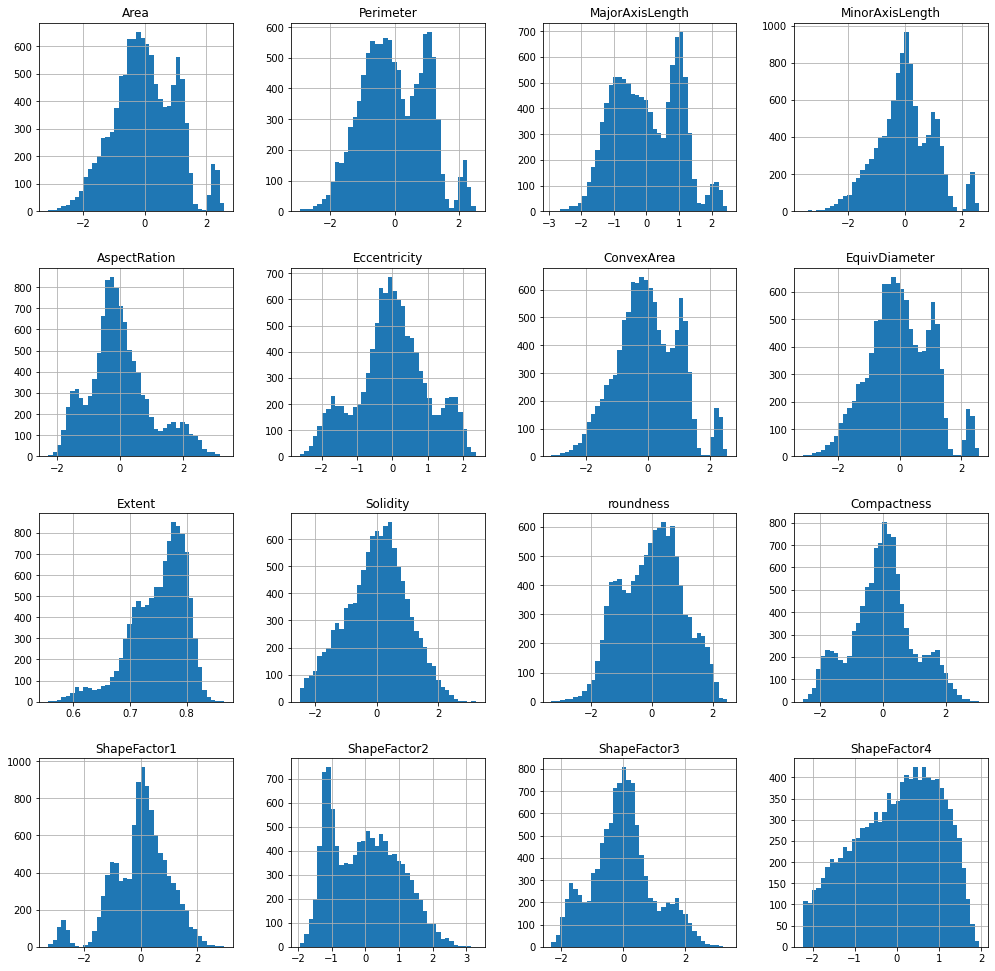

In [ ]:
# check skewness fixed
hist_df = data.drop(['ID','y'], axis = 1)
hist_df.hist(layout=(4,4), figsize=(17,17),bins=40)
plt.show()

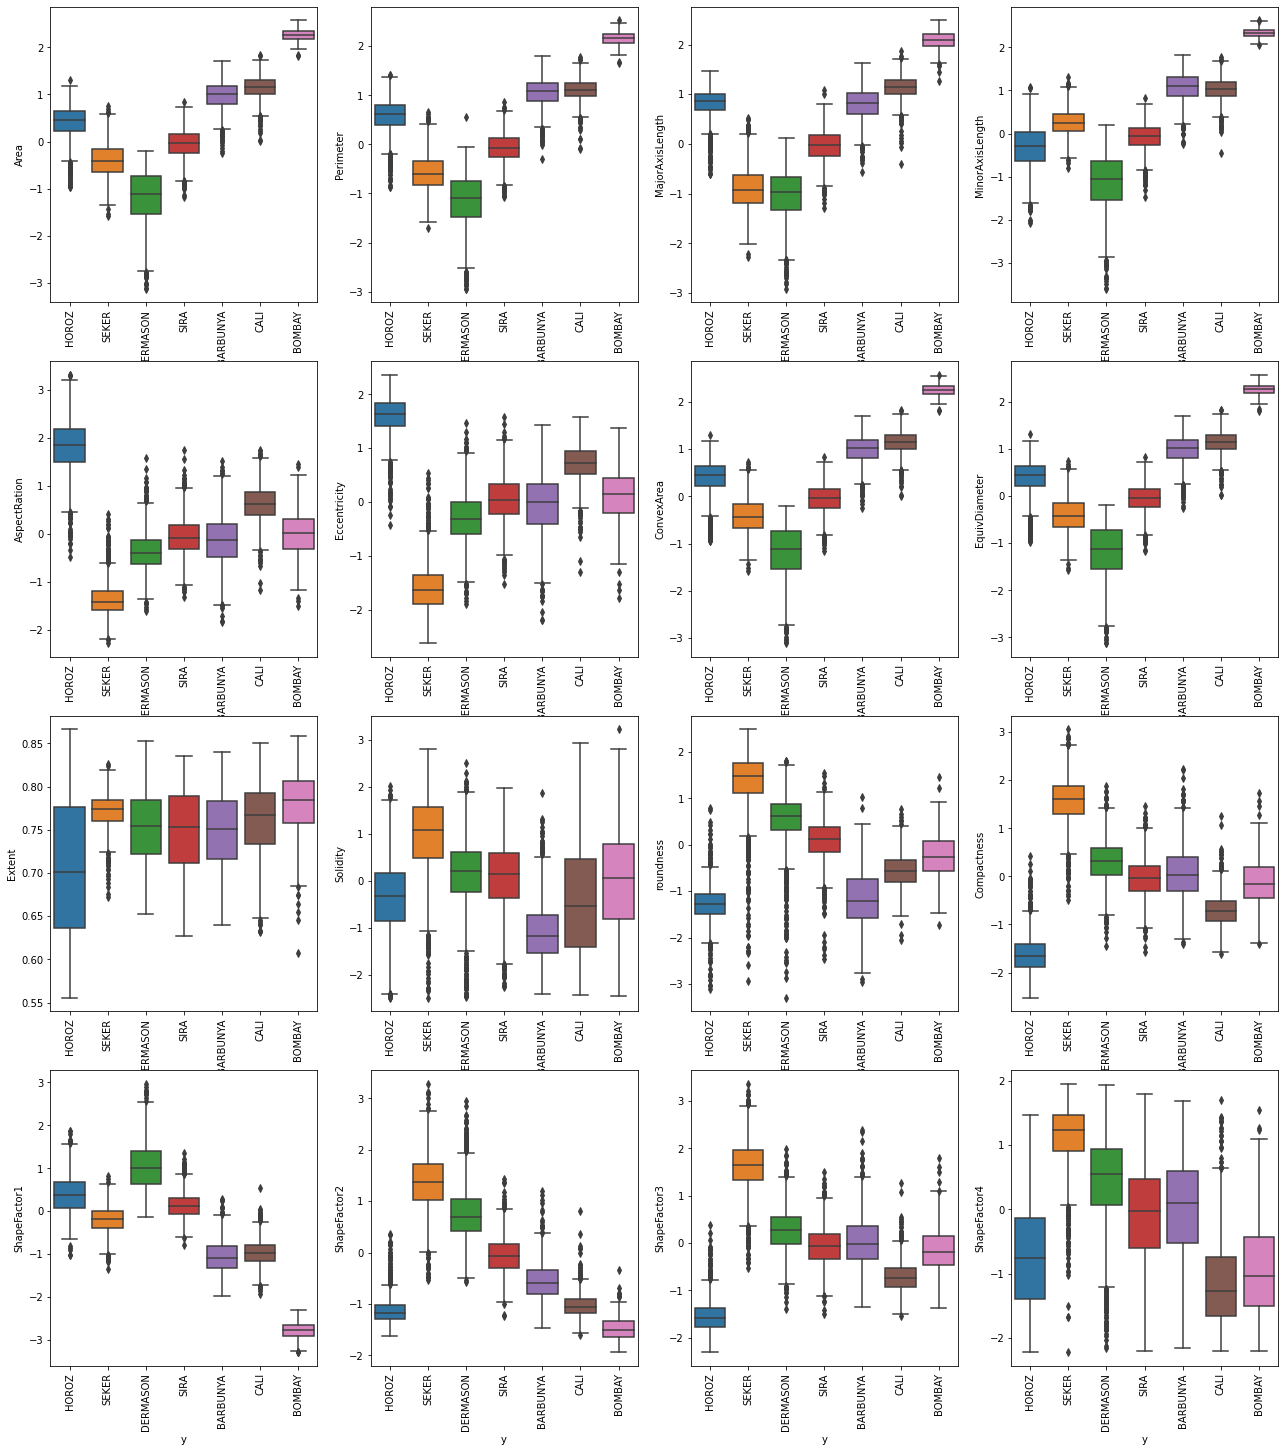

In [ ]:
#check outliers in data after removing skweness
col = data.drop(['ID','y'],axis=1).columns
fig, axes = plt.subplots(4,4, figsize=(22,25))
for i,t in enumerate(col):
    ax = sns.boxplot(y=t, x= "y", data=data, orient='v', ax=axes.flatten()[i] )
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [ ]:
X = data.drop(['ID','y'], axis = 1)

In [ ]:
#removing outliers:
print('Number of of samples in the dataset before removing outliers: %d' % len(data))
data_outlierRemove = data.drop(detect_outliers(data,X.columns), axis=0).reset_index(drop=True)
print('Number of of samples in the dataset after removing outliers: %d' % len(data_outlierRemove))

Number of of samples in the dataset before removing outliers: 10834
Number of of samples in the dataset after removing outliers: 10581


In [ ]:
from sklearn.tree import ExtraTreeClassifier

X=data_outlierRemove.drop("y",axis=1)
y=data_outlierRemove.y

model=ExtraTreeClassifier()
model.fit(X,y)

print(model.feature_importances_)

feat=pd.Series(model.feature_importances_,index=X.columns)
feats=feat.to_frame().reset_index()
feats.columns=["Features","Scores"]
features=feats.sort_values(by="Scores",ascending=False)
#features
top_features=features.nlargest(12,"Scores")
top_features

[0.00878497 0.05825673 0.01589338 0.01564468 0.04631124 0.04568882
 0.09702836 0.27216838 0.0520759  0.00934348 0.0214007  0.03361526
 0.02115574 0.05785012 0.00961497 0.18215662 0.05301066]


,Features,Scores
7,ConvexArea,0.272168
15,ShapeFactor3,0.182157
6,Eccentricity,0.097028
1,Area,0.058257
13,ShapeFactor1,0.057850
16,ShapeFactor4,0.053011
8,EquivDiameter,0.052076
4,MinorAxisLength,0.046311
5,AspectRation,0.045689
11,roundness,0.033615


In [ ]:
feature_selected = top_features['Features']
df = data_outlierRemove[top_features['Features']].copy()
df = pd.concat([df,data_outlierRemove['y']], axis = 1)
X = df.drop(['y'], axis = 1)
Y = data_outlierRemove['y']
X

,ConvexArea,ShapeFactor3,Eccentricity,Area,ShapeFactor1,ShapeFactor4,EquivDiameter,MinorAxisLength,AspectRation,roundness,Solidity,Compactness
0,-0.059443,1.621877,-1.614147,-0.041073,-0.526343,0.547729,-0.041073,0.588731,-1.391835,2.055287,2.812014,1.570313
1,-1.152173,0.573092,-0.608038,-1.151854,0.902962,0.730095,-1.151854,-0.934769,-0.642144,1.010616,0.090865,0.599206
2,-0.457169,0.417275,-0.435944,-0.453705,0.322302,1.615147,-0.453705,-0.289026,-0.502811,0.457643,0.311062,0.448979
3,-0.174349,0.413335,-0.451781,-0.172339,0.046731,0.162312,-0.172339,0.021926,-0.515832,0.157444,0.103604,0.445159
4,-0.817222,1.918363,-1.848486,-0.814780,0.064009,1.462959,-0.814780,-0.011560,-1.561517,1.133216,0.247533,1.833373
...,...,...,...,...,...,...,...,...,...,...,...,...
10576,-0.542570,1.265712,-1.290991,-0.537348,0.055872,0.715051,-0.537348,0.005019,-1.158653,0.904459,0.519899,1.247915
10577,-1.089276,0.237909,-0.259854,-1.090773,1.010442,0.683553,-1.090773,-1.061016,-0.355019,0.518221,-0.071103,0.273955
10578,1.300631,-0.921288,0.954830,1.310866,-1.116522,-0.565761,1.310866,1.136462,0.879797,-0.416559,1.249186,-0.917823
10579,0.174332,-0.039535,0.014117,0.176970,-0.121563,-0.452259,0.176970,0.204855,-0.112764,0.125910,0.100489,-0.001391


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


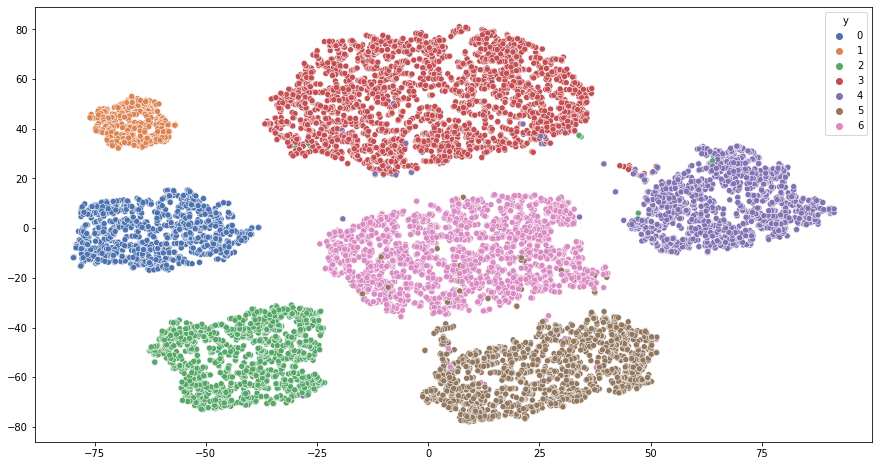

In [ ]:
# #visualize features afrer preproccessing
# from sklearn.manifold import TSNE
# Y = data_outlierRemove['y']
# X = data_outlierRemove
# tsne_res = TSNE(n_components=2).fit_transform(MinMaxScaler().fit_transform(X.select_dtypes(include=np.number)))
# plt.figure(figsize=(15,8))
# sns.scatterplot(x=tsne_res[:,0], y=tsne_res[:,1], hue= Y, palette='deep') 

# TSNE with 2 components models

In [ ]:
# tsne_df = pd.DataFrame(tsne_res) 
# tsne_df

In [ ]:
# Y = data_outlierRemove['y']
# X = data_outlierRemove

In [ ]:
# from sklearn.decomposition import PCA

# pca_1 = PCA(n_components=8 , random_state=2)
# pca1 = pca_1.fit_transform(X)
# pca1 = pd.DataFrame(pca1)


In [ ]:
# X = data_outlierRemove.drop(['ID','y'], axis = 1)
# Y = data_outlierRemove['y']

In [ ]:
from sklearn.model_selection import cross_val_score,train_test_split

X_train ,   X_val  , y_train , y_val = train_test_split(X , Y, test_size=0.00001, random_state=42)
#  stratify=data["y"], shuffle=True

print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)
print(y_val)

(10580, 12) (1, 12) (10580,) (1,)
5359    SIRA
Name: y, dtype: object


In [ ]:
oversample = SMOTE(random_state=42)
x_smote, y_smote = oversample.fit_resample(X_train, y_train)

# hyperparamter tunung

In [ ]:
!pip install BayesianOptimization

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=20039d85c54a709e45371ebed2413b3cb4f5e5485292ca6b1d97ca03808792b4
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
# Gradient Boosting Machine
import time
from bayes_opt import BayesianOptimization

def svm_cl_bo(max_depth, max_features, learning_rate, n_estimators, subsample):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['learning_rate'] = learning_rate
    params_gbm['n_estimators'] = round(n_estimators)
    params_gbm['subsample'] = subsample
    scores = cross_val_score(GradientBoostingClassifier(random_state=123, **params_gbm),
                             X_train, y_train, scoring=acc_score, cv=5).mean()
    score = scores.mean()
    return score
# Run Bayesian Optimization
start = time.time()
params_gbm ={
    'max_depth':(3, 10),
    'max_features':(0.8, 1),
    'learning_rate':(0.01, 1),
    'n_estimators':(80, 150),
    'subsample': (0.8, 1)
}
gbm_bo = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=111)
gbm_bo.maximize(init_points=20, n_iter=4)
print('It takes %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... | subsample |
-------------------------------------------------------------------------------------


NameError: ignored

In [ ]:

import time
from bayes_opt import BayesianOptimization , UtilityFunction
from sklearn.metrics import roc_auc_score
# Create the optimizer. The black box function to optimize is not
# specified here, as we will call that function directly later on.

optimizer = BayesianOptimization(f = None, 
                                 pbounds = {"C": [0.01, 10], 
                                            "degree": [1, 7]}, 
                                 verbose = 2, random_state = 42)

utility = UtilityFunction(kind = "ucb", kappa = 1.96, xi = 0.01)
# We want to optimize both C and degree simultaneously.
#X_train ,   X_val  , y_train , y_val
def black_box_function(C, degree):
    model = SVC(C = C, degree = degree)
    model.fit(X_train, y_train)
    y_score = model.decision_function(X_val)
    #f = roc_auc_score(y_val, y_score, multi_class='ovr')
    f = f1_score(y_val, y_score, average='micro')
    return f
# Optimization for loop.
for i in range(25):
    # Get optimizer to suggest new parameter values to try using the
    # specified acquisition function.
    next_point = optimizer.suggest(utility)
    # Force degree from float to int.
    next_point["degree"] = int(next_point["degree"])
    # Evaluate the output of the black_box_function using 
    # the new parameter values.
    target = black_box_function(**next_point)
    try:
        # Update the optimizer with the evaluation results. 
        # This should be in try-except to catch any errors!
        optimizer.register(params = next_point, target = target)
    except:
        pass
print("Best result: {}; f(x) = {:.3f}.".format(optimizer.max["params"], optimizer.max["target"]))
plt.figure(figsize = (15, 5))
plt.plot(range(1, 1 + len(optimizer.space.target)), optimizer.space.target, "-o")
plt.grid(True)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Black box function f(x)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

ValueError: ignored

In [ ]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=6, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf',degree=6, gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', degree=6, gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear' ,degree=6, gamma="auto")


In [ ]:
from sklearn.model_selection import GridSearchCV
for i in range(4):
    # Separate data into test and training sets
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_val)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_val,y_pred))


from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1,2,3,4,5,6, 10, 11], 'gamma': [1,0.1,0.2,0.23,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print(grid.best_estimator_)

# model testing

In [ ]:
# svm classifier
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.svm import SVC
#,
#svc = SVC( random_state=42).fit(X_train,y_train)
svc = SVC(C=10, gamma = 0.08,kernel='rbf', degree=6, random_state=42).fit(X_train,y_train)
# svc=SVC()
pred8 = svc.predict(X_val)

print("\n SVC Train set Accuracy: ", accuracy_score(y_train, svc.predict(X_train)))
print("\n SVC Test set Accuracy: ", accuracy_score(y_val, pred8))

print("\nclassification_report metric :")
# print(classification_report(y_val,pred8)) 
print(classification_report(X_train,y_train)) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier  
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
# Create an instance of the classifier
decisiontree =DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_pred3 = decisiontree.predict(X_val)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred3)

print ( 'Accuracy = ', accuracy)
print("\nclassification_report metric :")
print(classification_report(y_val,y_pred3)) 

Accuracy =  0.9968553459119497

classification_report metric :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       0.98      1.00      0.99        41
           3       1.00      0.99      0.99        86
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00        63

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



In [ ]:
np.array(y_smote)

array(['SEKER', 'DERMASON', 'BARBUNYA', ..., 'SIRA', 'SIRA', 'SIRA'],
      dtype=object)

In [ ]:
pred

array(['SIRA', 'BARBUNYA', 'DERMASON', ..., 'HOROZ', 'SEKER', 'BARBUNYA'],
      dtype=object)

In [ ]:
# svm classifier
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.svm import SVC
#,
#svc = SVC( random_state=42).fit(X_train,y_train)
svc = SVC(C=10, gamma = 0.08,kernel='rbf', degree=6, random_state=2).fit(x_smote,y_smote)
# svc=SVC()
pred = svc.predict(X_val)

print("\n SVC Train set Accuracy: ", accuracy_score(y_smote, svc.predict(x_smote)))
print("\n SVC Test set Accuracy: ", accuracy_score(y_val, pred))

print("\nclassification_report metric :")
# print(classification_report(y_val,pred)) 
# y_smote=np.array(y_smote)
# print(classification_report(x_smote,y_smote)) 


 SVC Train set Accuracy:  0.9489504789076829

 SVC Test set Accuracy:  1.0

classification_report metric :


In [ ]:
print(classification_report(np.array(x_smote),np.array(y_smote))) 

# XG BOOST

In [ ]:
import xgboost as xgb 

n_estimators = 1000
max_depth = 4
colsample_bytree = 0.9
subsample = 0.6
learning_rate = 0.01
eval_metric = "merror"

xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth,colsample_bytree=colsample_bytree,

                              subsample=subsample,learning_rate=learning_rate,objective="multi:softmax",

                              eval_metric =eval_metric, random_state=2, n_jobs = -1, 

                              use_label_encoder=False).fit(x_smote,y_smote)

In [ ]:
pred = xgb_model.predict(X_val)

print("\n SVC Train set Accuracy: ", accuracy_score(y_smote, xgb_model.predict(x_smote)))
print("\n SVC Test set Accuracy: ", accuracy_score(y_val, pred))

print("\nclassification_report metric :")
print(classification_report(y_val,pred)) 


 SVC Train set Accuracy:  0.9613307519869574

 SVC Test set Accuracy:  1.0

classification_report metric :
              precision    recall  f1-score   support

        SIRA       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



# preparing test data file

In [ ]:
# new test apply on all features
test_data = pd.read_csv("/content/drive/MyDrive/kaggle_competition1_resources/dataset/test.csv")
# test_data.info()
# box-cox transformer for skewed features
from scipy import stats
cols = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Solidity','roundness','ShapeFactor4']
other_cols = ['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

test_data[cols] = PowerTransformer(method='box-cox').fit_transform(test_data[cols])
test_data[other_cols] = StandardScaler().fit_transform(test_data[other_cols])
test_ = test_data[feature_selected]
# from sklearn.manifold import TSNE
# X = test_data
# tsne_res = TSNE(n_components=2).fit_transform(MinMaxScaler().fit_transform(X.select_dtypes(include=np.number)))
# test_ = pd.DataFrame(tsne_res) 
# pca_test = PCA(n_components=8 , random_state=2)
# test_ = pca_test.fit_transform(test_data)
# test_ = pd.DataFrame(test_)



In [ ]:
y_test_predicted = xgb_model.predict(test_)
print(len(y_test_predicted))
test_data['y'] = y_test_predicted

2709


In [ ]:
# test_data['y'] = y_test_predicted

# test_data['y'] = test_data['y'].replace([0,1,2,3,4,5,6],['SIRA','BOMBAY','DERMASON', 'BARBUNYA', 'HOROZ', 'CALI', 'SEKER'])
# test_data.head()

In [ ]:
test_data[['ID','y']].to_csv('/content/drive/MyDrive/kaggle_competition1_resources/submission_trials/XGboost.csv', index=False)